In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
plot_base = "../1_data/plots"

In [3]:
import matplotlib

matplotlib.__version__

'3.3.4'

In [4]:
base_path = "../1_data/tensorboard_model_selection_data"

In [5]:
import os

def rename_experiment_runs(nr_splitpoint, replay_buff_nr, experiment_tag, n_run_digits=2):
    for item in os.listdir(base_path):
        if item.startswith("run-dqn_"):
            nr = item.split(nr_splitpoint)[1][:n_run_digits]
            tag_segments = item.split('-tag-')[1][:-4].split('_')
            tag = '_'.join(tag_segments)
            print(tag_segments)
            new_name = (f"{base_path}/rpb{replay_buff_nr}"
                        f"{experiment_tag}{nr}__{tag}.csv")
            if os.path.exists(new_name):
                os.remove(new_name)
            os.rename(f"{base_path}/{item}", 
                      f"{base_path}/rpb{replay_buff_nr}"
                      f"{experiment_tag}{nr}__{tag}.csv")

# # for the dqn fea h experiments
rename_experiment_runs('_v4_', 1, "_dqn__h6A_fea10S__", n_run_digits=1)
# for the dqn raw direct experiments
rename_experiment_runs('__FJc14_100_', 1, '_directOA_fullS__')
# JA
rename_experiment_runs('__FJc14_100_', 1, '_directJA_fullS__', n_run_digits=1)

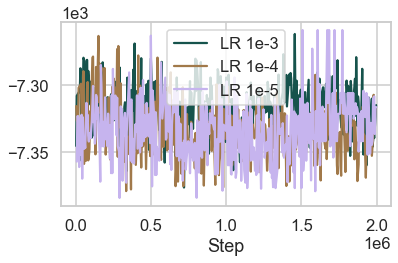

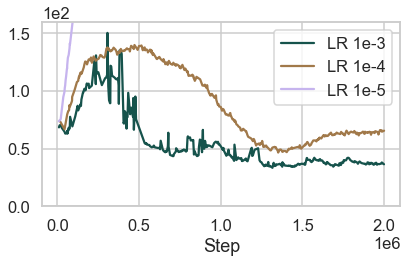

----------------------------------------------


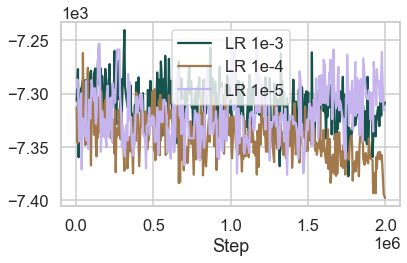

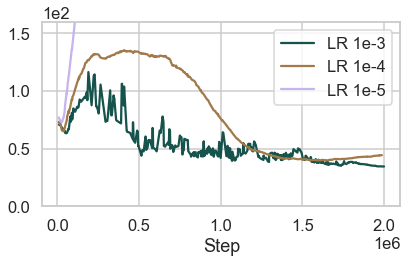

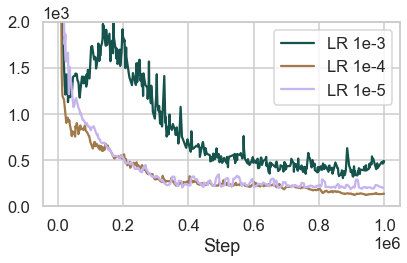

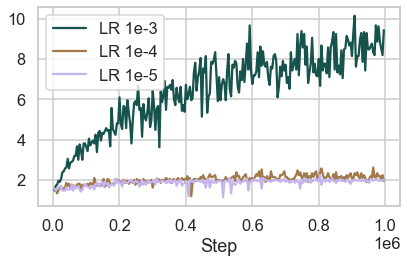

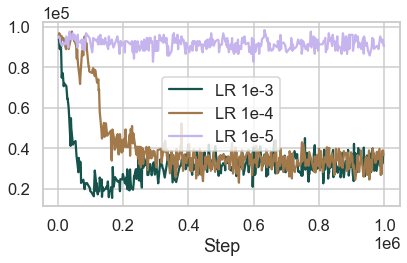

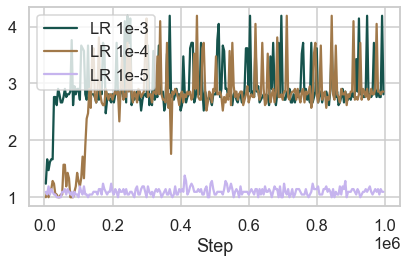

In [6]:
#plt.figure(figsize=(6.4, 4.8))

# evaluation plot
def plot_eval_reward(model_numbers, lr, replay_buffer_num, design_type, tag, ylabel, 
                     experiment_name='dqn__h6A_fea10S', y_lim=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    color = cycle(sns.color_palette('cubehelix', 3))
    ax = None
    if model_numbers:
        for df_nr in model_numbers:
            eval_df = pd.read_csv(f'{base_path}/'
                                  f'rpb{replay_buffer_num}_{experiment_name}__'
                                  f'{df_nr}__{tag}.csv')
            eval_df_sample = eval_df.sample(min([eval_df.shape[0], 400]))
            ax = sns.lineplot(data=eval_df_sample, x='Step', y='Value', 
                              label=f'LR {lr[df_nr]}', color=next(color), ax=ax)
        ax.ticklabel_format(style='sci', axis='both', scilimits=(0,2))
        ax.set_ylabel(ylabel)
        if y_lim is not None:
            plt.ylim(top=y_lim, bottom=0)
    plt.tight_layout()
    plt.savefig(f"{plot_base}/53_dqn_{design_type}__rpb{replay_buffer_num}_{tag}.png", 
                pad_inches=0.02, bbox_inches='tight', dpi=200)
    plt.show()

# h action
lrates = {3: '1e-3', 2: "1e-4", 1:"1e-5", 4: '1e-3', 5: "1e-4", 6:"1e-5"}
plot_eval_reward([3, 2, 1], lrates, 1, 'fh', 'eval_mean_reward', 
                 "")
plot_eval_reward(model_numbers=[3, 2, 1], lr=lrates, 
                 replay_buffer_num=1, design_type='fh', 
                 tag='train_loss', ylabel="", y_lim=160)
print("----------------------------------------------")
plot_eval_reward([4, 5, 6], lrates, 2, 'fh', 'eval_mean_reward', 
                 "")
plot_eval_reward([4, 5, 6], lrates, 2, 'fh', 'train_loss', 
                 "", y_lim=160)
print("==============================================")

# # direct action (j)
lrates = {3: '1e-3', 2: "1e-4", 1:"1e-5"}
plot_eval_reward(model_numbers=[3, 2, 1], lr=lrates, 
                 replay_buffer_num=1, design_type='rj', 
                 tag='train_loss', ylabel="", 
                 experiment_name='directJA_fullS', y_lim=2000)
# plot_eval_reward(model_numbers=[36, 38, 39], learning_rates=lr, 
#                  replay_buffer_num=1, design_type='rj', 
#                  tag='eval_mean_reward', ylabel="Mean Episode Reward", 
#                  experiment_name='directJA_partS')
plot_eval_reward(model_numbers=[3, 2, 1], lr=lrates, 
                 replay_buffer_num=1, design_type='rj', 
                 tag='eval_mean_ep_length', ylabel="", 
                 experiment_name='directJA_fullS')
print("==============================================")
# direct action (op)
lrates = {17: '1e-3', 16: "1e-4", 15:"1e-5"}
plot_eval_reward(model_numbers=[17, 16, 15], lr=lrates, 
                 replay_buffer_num=1, design_type='ro', 
                 tag='train_loss', ylabel="", 
                 experiment_name='directOA_fullS')
# plot_eval_reward(model_numbers=[17, 16, 15], learning_rates=lr, 
#                  replay_buffer_num=1, design_type='ro', 
#                  tag='eval_mean_reward', ylabel="Mean Episode Reward", 
#                  experiment_name='directOA_fullS')
plot_eval_reward(model_numbers=[17, 16, 15], lr=lrates, 
                 replay_buffer_num=1, design_type='ro', 
                 tag='eval_mean_ep_length', ylabel="", 
                 experiment_name='directOA_fullS')
print("==============================================")

(1000, 3)
(1000, 3)


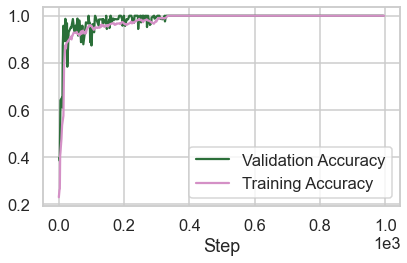

(1000, 3)
(1000, 3)


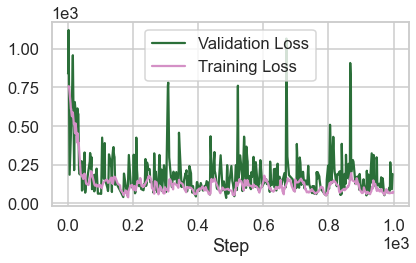

----------------------------------------------


In [7]:
# evaluation plot
def plot_eval_reward(model_numbers, lr, replay_buffer_num, design_type, tag, ylabel, 
                     experiment_name='dqn__h6A_fea10S', y_lim=None, algo='dqn'):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    color = cycle(sns.color_palette('cubehelix', 2))
    ax = None
    if model_numbers:
        for df_nr in model_numbers:
            eval_df = pd.read_csv(f'{base_path}/'
                                  f'rpb{replay_buffer_num}_{experiment_name}__'
                                  f'{df_nr}__{tag}.csv')
            if algo == 'az':
                eval_df['Step'] = list(range(eval_df.shape[0]))
            print(eval_df.shape)
            eval_df_sample = eval_df.sample(min([eval_df.shape[0], 400]))
            ax = sns.lineplot(data=eval_df_sample, x='Step', y='Value', 
                              label=f'{lr[df_nr]}', color=next(color), ax=ax)
        ax.ticklabel_format(style='sci', axis='both', scilimits=(0,2))
        ax.set_ylabel(ylabel)
        if y_lim is not None:
            plt.ylim(top=y_lim, bottom=0)
    plt.tight_layout()
    plt.savefig(f"{plot_base}/53_{algo}_{design_type}__rpb{replay_buffer_num}_{tag}.png", 
                bbox_inches='tight', pad_inches=0.02, 
                dpi=200)
    plt.show()

# h action
lrates = {2: "Validation Accuracy", 1: "Training Accuracy"}
plot_eval_reward(model_numbers=[2, 1], lr=lrates, 
                 replay_buffer_num=1, design_type='fh', 
                 experiment_name='az__h6A_fea10S',
                 tag='pi_acc', ylabel="", algo='az')
lrates = {2: "Validation Loss", 1: "Training Loss"}
plot_eval_reward(model_numbers=[2, 1], lr=lrates, 
                 replay_buffer_num=1, design_type='fh', 
                 experiment_name='az__h6A_fea10S',
                 tag='v_mae', ylabel="", algo='az')
print("----------------------------------------------")

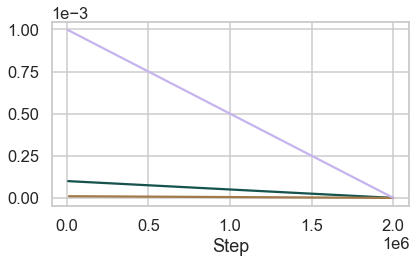

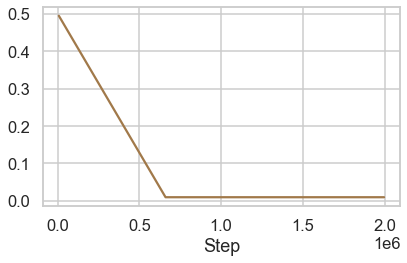

In [8]:
# evaluation plot
def plot_commons(commons='lr', y_lim=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    ax = None
    if commons == 'lr':
        color = cycle(sns.color_palette('cubehelix', 3))
        for df_nr in [3, 4, 5]:
            eval_df = pd.read_csv(f'{base_path}/common_lr1e-{df_nr}.csv')
            eval_df_sample = eval_df.sample(min([eval_df.shape[0], 400]))
            ax = sns.lineplot(data=eval_df_sample, x='Step', y='Value',
                              color=next(color), ax=ax)
        #ax.set_ylabel(r'$\alpha$')
        ax.set_ylabel('')
    if y_lim is not None:
        plt.ylim(top=y_lim, bottom=0)
    if commons == 'eps':
        color = cycle(sns.color_palette('cubehelix', 1))
        eval_df = pd.read_csv(f'{base_path}/common_eps.csv')
        eval_df_sample = eval_df.sample(min([eval_df.shape[0], 400]))
        ax = sns.lineplot(data=eval_df_sample, x='Step', y='Value', color=next(color), ax=ax)
        #ax.set_ylabel(r"$\epsilon$")
        ax.set_ylabel('')
    ax.ticklabel_format(style='sci', axis='both', scilimits=(-2,2))
    plt.tight_layout()
    plt.savefig(f"{plot_base}/53_dqn_commons_{commons}.png", bbox_inches='tight', pad_inches=0.02, dpi=200)
    plt.show()

plot_commons('lr')
plot_commons('eps')